# Data Preprocessing and Normalization

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r'C:\Users\kevin\Desktop\VSCode\ScaleDux\Startup_Scoring_Dataset.csv')
df.head()

,startup_id,team_experience,market_size_million_usd,monthly_active_users,monthly_burn_rate_inr,funds_raised_inr,valuation_inr
0,S001,7,789,66299,6091495,4183839,263247468
1,S002,4,939,34866,9106842,666326,172927107
2,S003,8,42,73630,8817088,649150,313090455
3,S004,5,57,93657,6374167,20153173,305887183
4,S005,7,512,61187,841971,118834,84815222


In [3]:
df.drop('startup_id', axis=1, inplace=True)

In [4]:
df['monthly_burn_rate_inr'] = df['monthly_burn_rate_inr'].max() - df['monthly_burn_rate_inr']

In [5]:
num_cols = df.select_dtypes(include=['int64']).columns

In [6]:
scaler = MinMaxScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

# Feature Engineering

In [7]:
# Defining weights for each feature
weights = {
    'team_experience': 15,
    'market_size_million_usd': 20,
    'monthly_active_users': 25,
    'monthly_burn_rate_inr': 10,
    'funds_raised_inr': 15,
    'valuation_inr': 15
}

In [8]:
features = list(weights.keys())

In [9]:
# Calculate composite score by multiplying each feature by its weight and summing them up
df['composite_score'] = sum(df[col] * weight for col, weight in weights.items())

In [10]:
X = df.drop('composite_score', axis=1).values
y = df['composite_score'].values

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training and Evaluation

In [12]:
# Build the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(32, activation='relu', input_shape=(len(features),)),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1)
])

In [13]:
# Compile the model
model.compile(optimizer='adam', loss='mse')

In [14]:
# Train the model
history = model.fit(
    X_train, y_train, 
    validation_data = (X_test, y_test), 
    epochs=150, 
    verbose=1, 
    validation_split=0.2
    )

Epoch 1/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - loss: 2645.6287 - val_loss: 2632.9976
Epoch 2/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 2694.3787 - val_loss: 2623.5198
Epoch 3/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 2770.4421 - val_loss: 2614.0005
Epoch 4/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 2663.0615 - val_loss: 2604.4917
Epoch 5/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 2642.3049 - val_loss: 2594.7903
Epoch 6/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 2685.1357 - val_loss: 2585.1985
Epoch 7/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 2664.4019 - val_loss: 2575.6113
Epoch 8/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 2525.1946 - val_loss: 2565.7183
Epoch 9/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 2629.1536 - val_loss: 2555.4187
Epoch 10/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 2694.1450 - val_loss: 2544.7122
Epoch 11/150
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 2694.6123 - val_loss: 2533.3384
Epoch 12

In [15]:
# Evaluate the model
preds = model.predict(X_test).flatten()
r2 = r2_score(y_test, preds)
mse = mean_squared_error(y_test, preds)
mae = mean_absolute_error(y_test, preds)
rmse = np.sqrt(mse)

print(f"R^2 Score: {r2:.4f}")
print(f"Mean Squared Error: {mse:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")
print(f"Root Mean Squared Error: {rmse:.4f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
R^2 Score: 0.8926
Mean Squared Error: 23.1243
Mean Absolute Error: 4.1238
Root Mean Squared Error: 4.8088


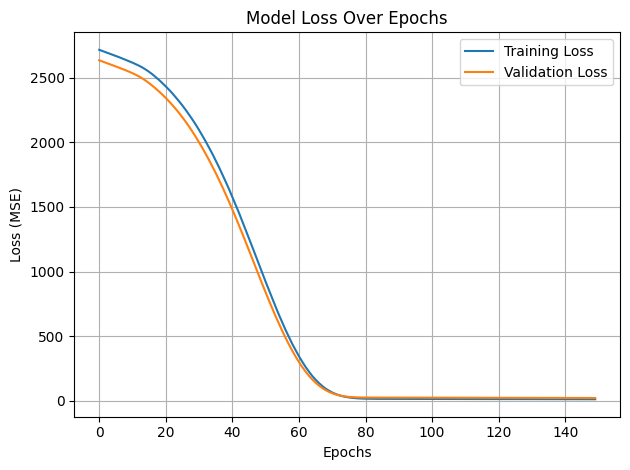

In [16]:
# Plotting training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [17]:
# Calculate feature importance
input_weights = model.layers[0].get_weights()[0]
feature_importance = np.mean(np.abs(input_weights), axis=1)

In [18]:
importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

In [19]:
print(importance_df)

                   Feature  Importance
2     monthly_active_users    0.316130
4         funds_raised_inr    0.294181
3    monthly_burn_rate_inr    0.281326
5            valuation_inr    0.277953
0          team_experience    0.272427
1  market_size_million_usd    0.265569


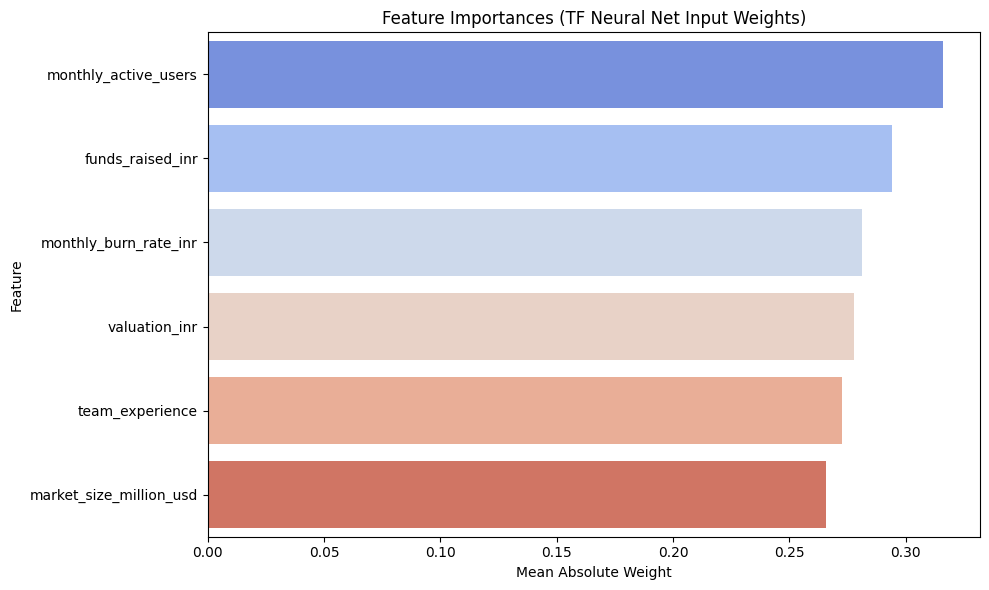

In [20]:
# Plotting feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='coolwarm')
plt.title('Feature Importances (TF Neural Net Input Weights)')
plt.xlabel('Mean Absolute Weight')
plt.tight_layout()
plt.savefig(r'C:\Users\kevin\Desktop\VSCode\ScaleDux\output\feature_importances_tensorflow.png')
plt.show()